<a href="https://www.kaggle.com/code/osmanacar/flo-rfm-analysis?scriptVersionId=187675111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**FLO-RFM Analysis**
*  master_id: unique customer number
*  order_channel :the channel where orders are placed
*  last_order_channel : the shopping platform that utilized by the customer (Android, ios, Desktop, Mobile, Offline)
*  first_order_date : customer's first purchase date
*  last_order_date : customer's last purchase date
*  last_order_date_online : customer's last purchase date on online platform
*  last_order_date_offline : customer's last purchase date on offline platform
*  order_num_total_ever_online : total number of purchases by customers on the online platform
*  order_num_total_ever_offline : total number of purchases by customers on the offline platform
*  customer_value_total_ever_offline : total amount of purchases by customers on the offline platform
*  customer_value_total_ever_online : total amount of purchases by customers on the online platform
*  interested_in_categories_12 : Category list for the last 12 months

In [1]:
import datetime as dt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [4]:
# We will create new variables for each customer's total amount and total number of purchases.
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [5]:
# If there is a variable that represents a date, we change the variable type**
all_of_date = df.columns[df.columns.str.contains("date")]
df[all_of_date] = df[all_of_date].apply(pd.to_datetime)

df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
order_num_total                             float64
customer_value_total                        float64
dtype: object

<Axes: xlabel='order_channel', ylabel='count'>

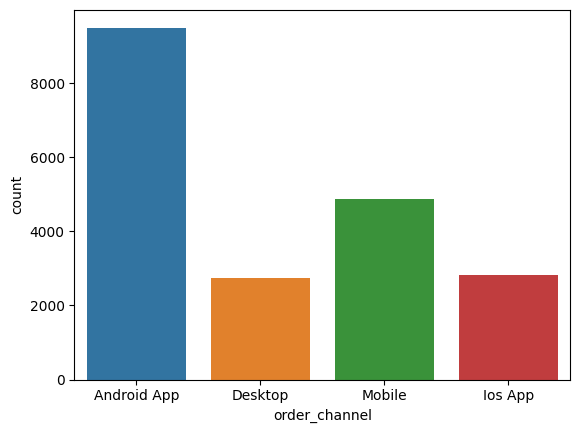

In [6]:
# Review of the number of the customers in order channels, the total number of products purchased and the total amount
df.groupby("order_channel").agg(
    {
        "master_id": "count",
        "order_num_total": "sum",
        "customer_value_total": "sum" 
    }
)

sns.countplot(x=df["order_channel"])

In [7]:
# The top 10 customers who bring the highest revenue
df.sort_values(by="customer_value_total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.000,36818.290
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",11.000,31227.410
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],4.000,20706.340
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",37.000,12726.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",20.000,12103.150


In [8]:
# The top 10 customers who place the most orders
df.sort_values(by="order_num_total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],88.000,8572.230
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],83.000,4240.360
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",77.000,5184.050
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.000,5297.880
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570


**Calculating RFM metrics**

In [9]:
# We choose the analysis date 2 days after the last purchase date.
df["last_order_date"].max() # 2021-05-30
today_date = dt.datetime(2021, 6, 1)

In [10]:
# We are creating new dataframe with customer_id, recency, frequency and monetary values.
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = df.apply(lambda x: (today_date - x["last_order_date"]).days, axis=1)
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980


In [11]:
# Calculating RFM scores**
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31


In [12]:
# RFM scores define as segment
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map, regex=True)
rfm.head(20)

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,about_to_sleep
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,80,3.000,200.860,4,2,1,42,potential_loyalists
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,226,4.000,375.930,2,3,2,23,at_Risk
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,293,2.000,163.630,1,1,1,11,hibernating
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,86,5.000,1054.690,3,4,5,34,loyal_customers
9,1143f032-440d-11ea-8b43-000d3a38a36f,240,2.000,165.960,1,1,1,11,hibernating


In [13]:
# We are gonna calculate mean and count for recency, frequency, monetary
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      113.785  1629     2.401  1629  359.009  1629
at_Risk             241.607  3131     4.472  3131  646.610  3131
cant_loose          235.444  1200    10.698  1200 1474.468  1200
champions            17.107  1932     8.934  1932 1406.625  1932
hibernating         247.950  3604     2.394  3604  366.267  3604
loyal_customers      82.595  3361     8.375  3361 1216.819  3361
need_attention      113.829   823     3.728   823  562.143   823
new_customers        17.918   680     2.000   680  339.956   680
potential_loyalists  37.156  2938     3.304  2938  533.184  2938
promising            58.921   647     2.000   647  335.673   647

**Question 1**

FLO company wants to communicate with its customers about the new women's shoe brand it will add.

for example champions/loyal customers and KADIN category. 

after process we will add to new dataframe for customer id's

In [14]:
# We add the categories column to the rfm dataframe.
rfm["interested_in_categories_12"] = df["interested_in_categories_12"].tolist()

rfm_for_female = rfm.loc[
    ((rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")) &
    (rfm["interested_in_categories_12"].str.contains("KADIN") == True),
    ["segment", "interested_in_categories_12"]
]

rfm_for_female.head(15)


# We will add user ids to a new dataset.

# new_rfm_for_woman = pd.DataFrame()
# new_rfm_for_woman["new_customer_for_woman_category_id"] = rfm_for_woman.index
# new_rfm_for_woman.to_csv("new_customer_for_woman_category_id.csv")

,segment,interested_in_categories_12
0,loyal_customers,[KADIN]
1,loyal_customers,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
8,loyal_customers,"[ERKEK, COCUK, KADIN]"
11,champions,"[COCUK, KADIN, AKTIFSPOR]"
33,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
60,champions,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]"
74,champions,"[ERKEK, KADIN, AKTIFSPOR]"
77,champions,"[AKTIFCOCUK, KADIN]"
80,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
83,loyal_customers,"[AKTIFCOCUK, ERKEK, COCUK, KADIN]"


In [15]:
rfm_for_female.shape[0]

2497

**Question 2**

FLO Company has planning %40 discount for ERKEK and COCUK category. 

They want to communicate past customers who should not be lost, at sleeping customers and new customers.

after process we will add to new dataframe for customer id's

In [16]:
rfm_for_male_and_child = rfm.loc[(((rfm["segment"] == "cant_loose") |
                (rfm["segment"] == "hibernating") |
                (rfm["segment"] == "new_customers"))) &
              (((rfm["interested_in_categories_12"].str.contains("ERKEK") == True) |
                (rfm["interested_in_categories_12"].str.contains("COCUK") == True))),
                ["segment","interested_in_categories_12"]
            ]

rfm_for_male_and_child.head(20)

,segment,interested_in_categories_12
7,hibernating,[COCUK]
10,hibernating,"[AKTIFCOCUK, COCUK, KADIN]"
15,cant_loose,"[AKTIFCOCUK, COCUK, KADIN]"
19,hibernating,[ERKEK]
21,hibernating,"[ERKEK, KADIN]"
29,hibernating,[ERKEK]
31,hibernating,"[COCUK, KADIN]"
35,hibernating,[AKTIFCOCUK]
45,hibernating,"[ERKEK, KADIN]"
48,hibernating,[ERKEK]


In [17]:
rfm_for_male_and_child.shape[0]

2771